# svm 支撑向量机
解决分类问题，解决回归问题
本质是寻找所有类之间的最佳决策超平面。所谓最佳就是不同分类中的决策超平面最近点到决策超平面之间的距离均相等，也就是说决策超平面处于各类最近点的正中间，各类最近点被称为各类的支撑向量。  
最佳决策超平面的泛化效果最好。svm目的就是最大化margin；解决线性可分问题；  
hard margin svm： 确实找到了一个决策边界  
soft margin svm： 其实就是增加了限定条件的hard margin svm

要最大化margin，也就是最大化d，最大化d类似于最大化支持向量到决策直线的距离：  
点到直线的距离公式：  
$$
\frac{| Ax+By+c |}{\sqrt{A^2+B^2}}
$$

上述公式拓展到n维空间:  $ w^Tx +b = 0 $
点到直线的距离：  
$$
\frac{|w^Tx+b|}{\|w\|}
$$

最大化margin的公式从下式推导：
$$
\begin{cases}
\frac{w^Tx+b}{\|w\|}\geq{d}     &  \forall{y^{(i)}}=1 \\
\frac{w^Tx+b}{\|w\|}\leq{-d}    &  \forall{y^{(i)}}=-1
\end{cases}
$$
可以转为：
$$
\begin{cases}
w_d^Tx+b_d\geq{1}     &  \forall{y^{(i)}}=1 \\
w_d^Tx+b_d\leq{-1}    &  \forall{y^{(i)}}=-1
\end{cases}
$$
可以转化为：
$$
y^{(i)}(w^Tx^{(i)}+b)\geq{1}    ,   (\text 这里w，b和仅仅是个记号，等同于上边的w_d,b_d)
$$
因为上述的公式$ w_d^Tx+b_d={1(或者 -1)} $，所以支持向量到决策直线的距离就等同于是1，所以最大化margin就变成了最大化||w||
$$
max{\frac{w^Tx+b}{\|w\|}}
$$  
等同于最大化  
$$
max{\frac{1}{\|w\|}}
$$  
等同于最小化  
$$
min{\|w\|}
$$  
等同于在限定条件$ y^{(i)}(w^Tx^{(i)}+b)\geq{1} $ 的条件下，求最小化   $ min{\frac{1}{2}\|w\|^2} $   
上述就是求解hard margin svm


通常hard margin svm是不存在的，因此我们需要使用soft margin svm的求解方法，基于hard margin svm
这里限定条件发生了变化，变为2个：  
$ y^{(i)}(w^Tx^{(i)}+b)\geq{1-\zeta_i} , \zeta_i\geq{0} $  
求最小化,其中C为引入的一个超参数：   
$ min{\frac{1}{2}\|w\|^2+C\sum_{i=1}^{m}{\zeta_i} } $， L1正则  
$ min{\frac{1}{2}\|w\|^2+C\sum_{i=1}^{m}{\zeta_i^2} } $， L2正则  

超参数C越大，容错空间越小；C越小，则容错空间越大；

## 使用SVM
- 必须预先数据归一化


In [7]:
from pylab import *
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]
y = y[y<2]

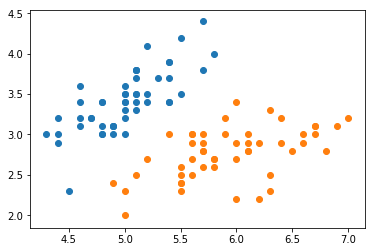

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
stdScaler.fit(X)
x_std = stdScaler.transform(X)

In [11]:
from sklearn.svm import LinearSVC # SVC用SV来Classify

svc  = LinearSVC(C=1e9)
svc.fit(x_std,y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

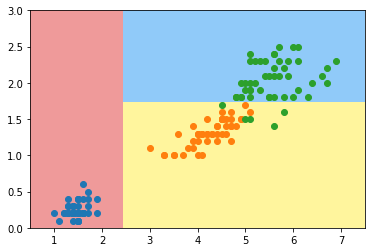

In [12]:
# %load ../pltboundary.py
"""
Created on Wed Jun 13 17:21:17 2018

@author: xhj
"""
from pylab import *
from sklearn import datasets

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
            np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
            np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
            )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap([ '#EF9A9A', '#FFF59D', '#90CAF9' ])
    plt.contourf(x0, x1, zz, linewidth=5, cmap = custom_cmap)
         

# 添加多项式项目  核函数， pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree,C=1.0,penalty='l2'):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])

from sklearn.linear_model import Ridge
def RidgeRegression(degree,alpha=1):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('ridge_reg', Ridge(alpha=alpha))
    ])

from sklearn.linear_model import Lasso
def LassoRegression(degree,alpha=1):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('lasso_reg', Lasso(alpha=alpha))
    ])


if __name__ == '__main__':
    iris = datasets.load_iris()
    XXX = iris.data[:, 2:]
    yyy = iris.target
    from sklearn.tree import DecisionTreeClassifier

    dt_clf = DecisionTreeClassifier(max_depth=2, criterion = "entropy")
    dt_clf.fit(XXX,yyy)
    plot_decision_boundary(dt_clf, axis= [0.5, 7.5, 0,3])

    plt.scatter(XXX[yyy==0,0], XXX[yyy==0,1])
    plt.scatter(XXX[yyy==1,0], XXX[yyy==1,1])
    plt.scatter(XXX[yyy==2,0], XXX[yyy==2,1])
    plt.show()
                                  

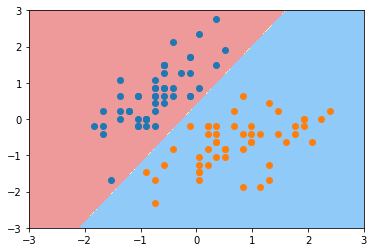

In [13]:
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()

In [14]:
svc2  = LinearSVC(C=0.01) #使用了L2正则
svc2.fit(x_std,y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

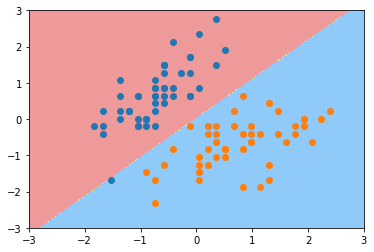

In [15]:
plot_decision_boundary(svc2, axis=[-3,3,-3,3])
plt.scatter(x_std[y==0, 0], x_std[y==0, 1])
plt.scatter(x_std[y==1, 0], x_std[y==1, 1])
plt.show()

In [16]:
# 找到支持向量，见11-4

# 使用多项式核函数处理非线性边界

In [17]:
from  sklearn import datasets
X,y = datasets.make_moons()

In [18]:
X.shape

(100, 2)

In [19]:
y.shape

(100,)

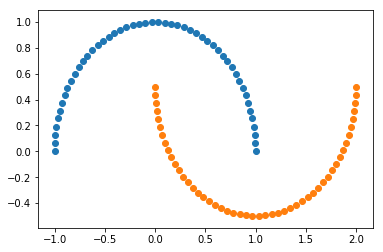

In [20]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [21]:
X,y = datasets.make_moons(noise=0.15, random_state=666)

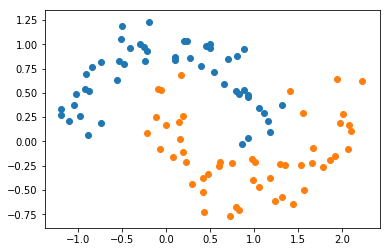

In [22]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('linearsvc', LinearSVC(C=C))
    ]
    )


In [24]:
ploy_svc = PolynomialSVC(degree=3)

In [25]:
ploy_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

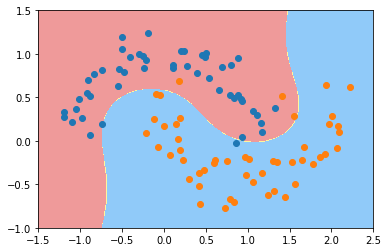

In [28]:
plot_decision_boundary(ploy_svc, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#  使用多项式核的svc


In [29]:
from sklearn.svm import SVC

def PolynomialSVC(degree,C=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='poly', degree=degree, C=C))  #与上面先处理多项式特征计算过程不同。
    ]
    )

In [30]:
ploy_svc = PolynomialSVC(degree=3)
ploy_svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

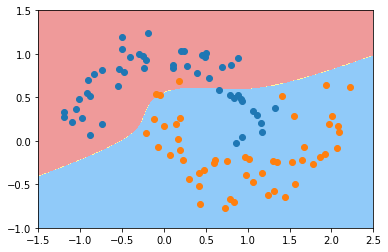

In [31]:
plot_decision_boundary(ploy_svc, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

##  什么是核函数

使用核函数就是避免对特征使用多项式，而是在最优化的过程中只要能够使用，就能够使用核函数，主要是SVM的优化过程中，核函数可以直接应用到最后的结果公式上，从而不必从头求特征的多项式结果。

最有名的核函数：  
高斯核函数  $ K(x,y) = e^{-\gamma\|x-y\|^2} $   之所以称为高斯核函数，因为和高斯函数（正态分布）基本一样  
高斯核函数也称为RBF核（radial Basis Function Kernel），也称为径向基函数，都是高斯核函数的别称。
高斯核函数将每一个样本点映射到一个无穷维的特征空间  
核函数的目的就是对数据升维，将线性不可分数据变为数据可分。


In [32]:
from sklearn.svm import SVC

def RBFSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))  #与上面先处理多项式特征计算过程不同。
    ]
    )

In [38]:
svc = RBFSVC(gamma=1.0)  # gamma低，欠拟合
svc.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

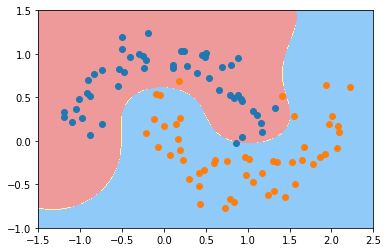

In [39]:
plot_decision_boundary(svc, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [40]:
svc100 = RBFSVC(gamma=100.0)  # 过拟合， gamma高，过拟合
svc100.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

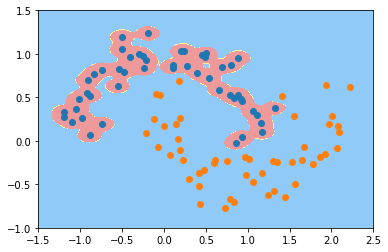

In [41]:
plot_decision_boundary(svc100, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [42]:
svc10 = RBFSVC(gamma=10.0)
svc10.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

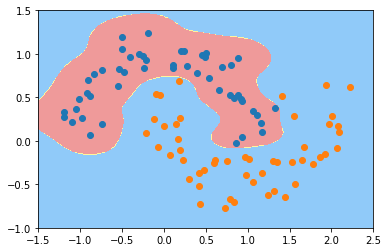

In [43]:
plot_decision_boundary(svc10, axis=[-1.5,2.5,-1,1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

#  svm解决回归问题

In [48]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y, random_state=666)

In [64]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

def standLinearSVR(epsilon=0.1):
     return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', LinearSVR(epsilon=epsilon))  #与上面先处理多项式特征计算过程不同。
    ]
    )

In [75]:
svr  = standLinearSVR(epsilon=0.6)
svr.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', LinearSVR(C=3, dual=True, epsilon=0.6, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [76]:
svr.score(x_test, y_test)

0.64017256909433662